In [23]:
from diffusion import DDMFunctions, Network

In [24]:
image_size = 28 ## 画像のサイズ
channels = 1 ## 画像のチャンネル数

In [25]:
model = Network.Unet(dim=image_size, channels=channels)

In [26]:
## title Mnistの学習済みモデルの読み込み
import torch
file_path = 'mnist_model.pkl' 
model.load_state_dict(torch.load(file_path, map_location='cpu'))
_ = model.eval()

# サンプリングの実行

In [27]:

timesteps=300 ## 逆拡散のステップ数
batch_size = 10 ## 一度に生成する画像の枚数
schedule_type = "linear" ## ノイズをどのようなスピード感で追加するか

dm = DDMFunctions.DDMFunctions(timesteps, schedule_type)
samples = dm.sample(model, image_size, batch_size, channels)

sampling loop time step: 100%|██████████| 300/300 [00:12<00:00, 23.48it/s]


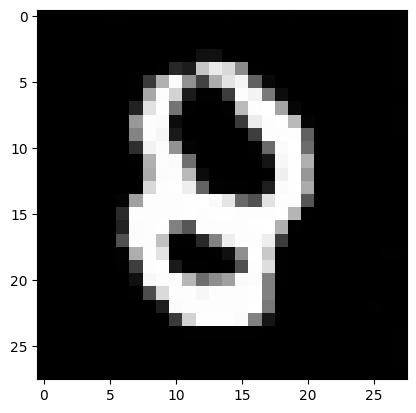

In [28]:
## 生成結果の表示
import matplotlib.pyplot as plt
random_index = 8 ## 生成する画像の番号
plt.imshow(samples[-1][random_index].reshape(image_size, image_size, channels), cmap="gray")

MovieWriter ffmpeg unavailable; using Pillow instead.


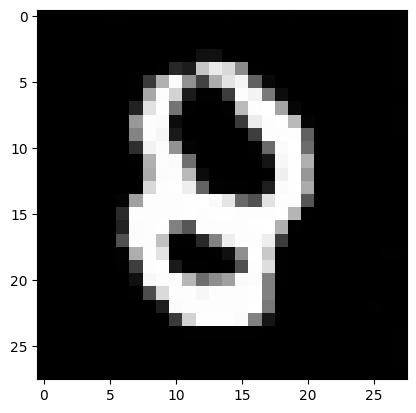

In [29]:
## 逆拡散プロセスのアニメーション化
gif_file_name = "denoising_diffusion_image.gif"
import matplotlib.animation as animation

fig = plt.figure()
ims = []
for i in range(timesteps):
    im = plt.imshow(samples[i][random_index].reshape(image_size, image_size, channels), cmap="gray", animated=True)
    ims.append([im])

animate = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
animate.save(gif_file_name)